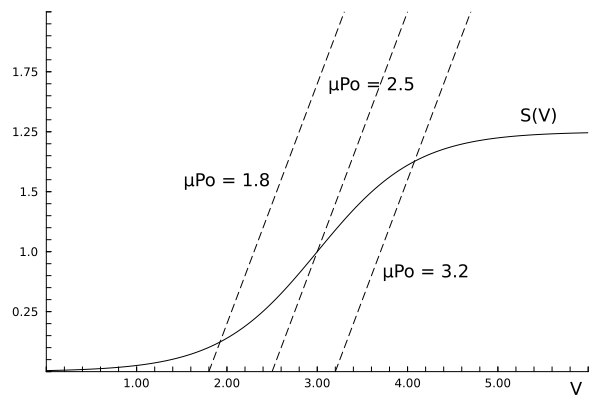

Solution for V0[1]: 1.9235627757679878
Solution for V0[1]: 2.9999999913758333
Solution for V0[1]: 4.07643722760594


In [71]:
# Figure 1
using DifferentialEquations, Plots, Plots.PlotMeasures, LaTeXStrings, Roots, NLsolve

c=1.82       #value taken from literature
Vr=3         #value taken from literature
V=0:0.01:6   #range of membrane potentials
S=1 ./(1 .+exp.(-c.*(V.-Vr)))  #sigmoid function

a_e=6 
a_i=5
brok_li_1=1.8
brok_li_2=2.5
brok_li_3=3.2
y_1= V.*(1.5)./1.5.+brok_li_1  #equation of the first broken line
y_2= V.*(1.5)./1.5.+brok_li_2  #equation of the second broken line
y_3= V.*(1.5)./1.5.+brok_li_3  #equation of the third broken line

# Plot Figure 1
p=plot( y_1, V, linestyle=:dash, color=:black, xlims=(0, 6), ylims=(0, 1.5), grid=false, legend=false) 

plot!(y_2, V, linestyle=:dash, color=:black)
plot!(y_3, V, linestyle=:dash, color=:black)
plot!(V, S, color=:black)

plot!(
    xticks=(
        vcat(0:1:6, 0:0.2:6),                
        vcat(["", "1.00", "2.00", "3.00", "4.00", "5.00", " "], repeat("", 30)) 
    ),
    yticks=(
        vcat(0:0.25:2, 0:0.05:2), 
        vcat(["", "0.25", "1.0", "1.5", "1.25", "1.75", " "], repeat("", 30))  
    ),
    
)

annotate!(5.8, -0.07, text("V", :left, 12))
annotate!(2, 0.8, text("µPo = 1.8", :black, 12))  
annotate!(3.6, 1.2, text("µPo = 2.5", :black, 12))
annotate!(4.2, 0.42, text("µPo = 3.2", :black, 12))
annotate!(5.45, 1.07, text("S(V)", :black, 12))

display(p)

# Define the non linear equation as a function
function equation(V)
    V[1] - (a_e - a_i) * (1 / (1 + exp(-c * (V[1] - Vr)))) -µ_Po
end


# Solve 
µ_Po=1.8
result = nlsolve(equation, [0.5])  
println("Solution for V0[1]: ", result.zero[1])

µ_Po=2.5
result = nlsolve(equation, [0.5])
println("Solution for V0[1]: ", result.zero[1])

µ_Po=3.2
result = nlsolve(equation, [0.5])
println("Solution for V0[1]: ", result.zero[1])
